In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dataloader import load_md_from_file
from simulator import Simulator

path_to_file = '/Users/ilyalobanov/CMF MFT/Final/Data/'
run_time = pd.Timedelta(10, 'm').delta

md = load_md_from_file(path_to_file)

md = md[1060:]

latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta
SLICE = 50000

md = md[:SLICE] # проверим на части данных 




In [2]:
sim = Simulator(md, latency, md_latency)

In [9]:
%load_ext autoreload
%autoreload 2

In [3]:
pred = np.load('predictions.npy')

In [4]:
pred = pred[:SLICE]

In [5]:
from backtest import Backtest

T = 0
M = 100
S = 1
C = 0

backtest = Backtest(pred, T, M, C, S)

trades_list, md_list, updates_list, all_orders, result = backtest.trade(sim)

/Users/ilyalobanov/opt/anaconda3/lib/python3.9/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed fr

In [7]:
from trade_statistics import TradeStats

stats = TradeStats()

pnl = stats.get_pnl(updates_list, C)

In [8]:
pnl

,exchange_ts,receive_ts,total,BTC,USD,mid_price
0,1.669854e+09,1.669854e+09,0.0000,0.0,0.000,44.0775
1,1.669854e+09,1.669854e+09,0.0175,-1.0,44.095,44.0775
2,1.669854e+09,1.669854e+09,0.0160,-1.0,44.095,44.0790
3,1.669854e+09,1.669854e+09,0.0320,-2.0,88.190,44.0790
4,1.669854e+09,1.669854e+09,0.0320,-2.0,88.190,44.0790
...,...,...,...,...,...,...
50095,1.669904e+09,1.669904e+09,-55.2150,-100.0,4407.935,44.6315
50096,1.669904e+09,1.669904e+09,-55.2150,-100.0,4407.935,44.6315
50097,1.669904e+09,1.669904e+09,-55.2150,-100.0,4407.935,44.6315
50098,1.669904e+09,1.669904e+09,-56.4650,-100.0,4407.935,44.6440


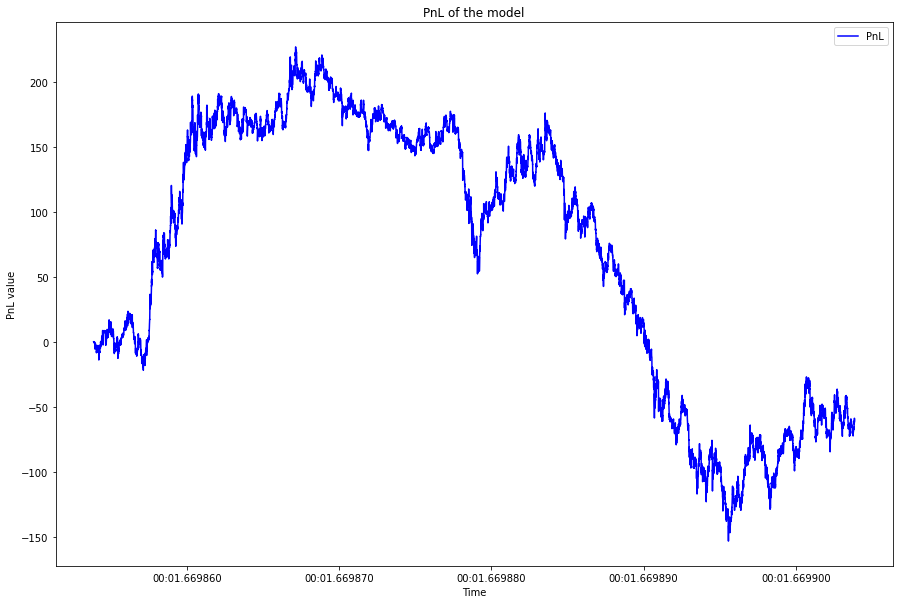

In [10]:
from plot_trades import Graphics

plotter = Graphics(updates_list)

plotter.cum_PnL()

In [14]:
T = 0
M = 3
S = 1
C = 0.01
commission = 0

backtest = Backtest(pred, T, M, C, S)
sim = Simulator(md, latency, md_latency)
trades_list, md_list, updates_list, all_orders, result = backtest.trade(sim)

stats = TradeStats()

pnl = stats.get_pnl(updates_list, C)

pnl

/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({


,exchange_ts,receive_ts,total,BTC,USD,mid_price
0,1.669854e+09,1.669854e+09,0.00000,0.0,0.00000,44.0775
1,1.669854e+09,1.669854e+09,-0.42345,-1.0,43.65405,44.0775
2,1.669854e+09,1.669854e+09,-0.42495,-1.0,43.65405,44.0790
3,1.669854e+09,1.669854e+09,-0.84990,-2.0,87.30810,44.0790
4,1.669854e+09,1.669854e+09,-0.84990,-2.0,87.30810,44.0790
...,...,...,...,...,...,...
49998,1.669904e+09,1.669904e+09,-2.93235,-3.0,130.96215,44.6315
49999,1.669904e+09,1.669904e+09,-2.93235,-3.0,130.96215,44.6315
50000,1.669904e+09,1.669904e+09,-2.93235,-3.0,130.96215,44.6315
50001,1.669904e+09,1.669904e+09,-2.96985,-3.0,130.96215,44.6440


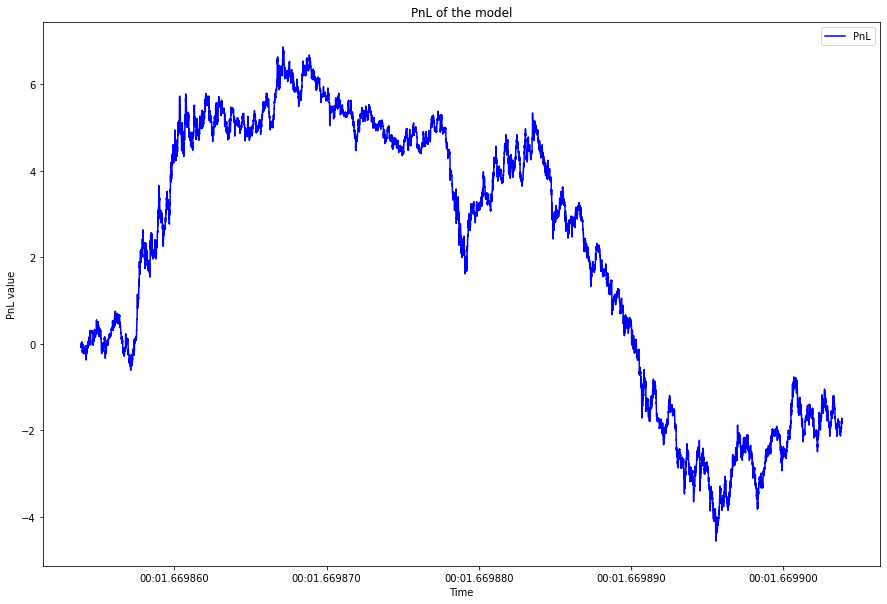

In [15]:
plotter = Graphics(updates_list)

plotter.cum_PnL()

In [16]:
T = 0.05
M = 50
S = 5
C = 0.001
commission = 0

backtest = Backtest(pred, T, M, C, S)
sim = Simulator(md, latency, md_latency)
trades_list, md_list, updates_list, all_orders, result = backtest.trade(sim)

stats = TradeStats()

pnl = stats.get_pnl(updates_list, C)

pnl

/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed fr

,exchange_ts,receive_ts,total,BTC,USD,mid_price
0,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0775
1,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0790
2,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0790
3,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0790
4,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0790
...,...,...,...,...,...,...
50005,1.669904e+09,1.669904e+09,-31.082695,-50.0,2200.492305,44.6315
50006,1.669904e+09,1.669904e+09,-31.082695,-50.0,2200.492305,44.6315
50007,1.669904e+09,1.669904e+09,-31.082695,-50.0,2200.492305,44.6315
50008,1.669904e+09,1.669904e+09,-31.707695,-50.0,2200.492305,44.6440


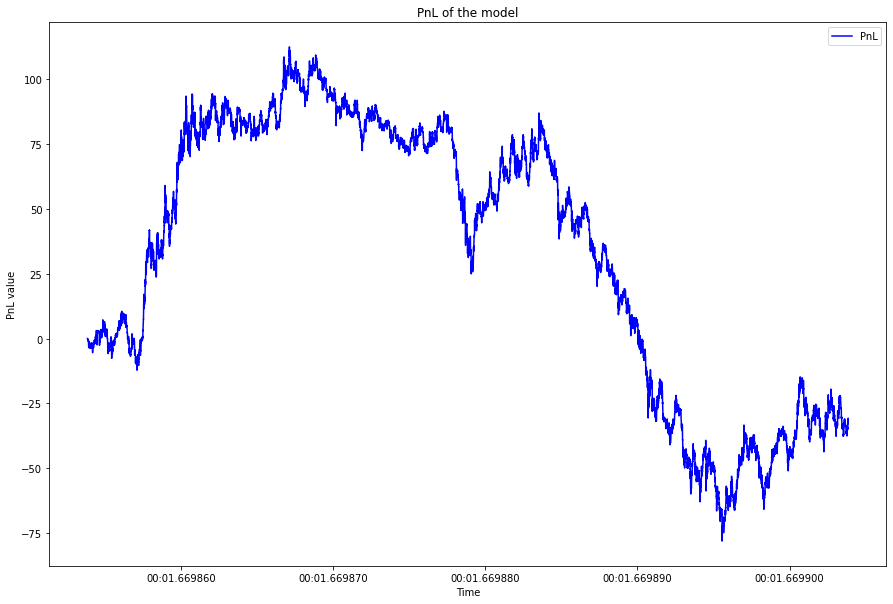

In [17]:
plotter = Graphics(updates_list)

plotter.cum_PnL()

Подберем оптимальное T 

In [23]:
t_arr = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01 , 0.1]

best_t =  0
max_pnl = -100
M = 100
S = 1
C = 0.001
for t in t_arr:
    T = t

    backtest = Backtest(pred, T, M, C, S)
    sim = Simulator(md, latency, md_latency)
    trades_list, md_list, updates_list, all_orders, result = backtest.trade(sim)

    stats = TradeStats()

    pnl = stats.get_pnl(updates_list, C)

    local_pnl = pnl.total.iloc[-1]

    if local_pnl > max_pnl:
        max_pnl = local_pnl
        best_t = t

print(best_t, max_pnl)

/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed fr

0.01 -60.95595199999934


In [24]:
T = 0.01
M = 100
S = 1
C = 0.001
commission = 0

backtest = Backtest(pred, T, M, C, S)
sim = Simulator(md, latency, md_latency)
trades_list, md_list, updates_list, all_orders, result = backtest.trade(sim)

stats = TradeStats()

pnl = stats.get_pnl(updates_list, C)

pnl

/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result = self.result.append({
/Users/ilyalobanov/CMF MFT/Final/backtest.py:60: FutureWarning: The frame.append method is deprecated and will be removed fr

,exchange_ts,receive_ts,total,BTC,USD,mid_price
0,1.669854e+09,1.669854e+09,0.000000,0.0,0.000000,44.0775
1,1.669854e+09,1.669854e+09,-0.026595,-1.0,44.050905,44.0775
2,1.669854e+09,1.669854e+09,-0.028095,-1.0,44.050905,44.0790
3,1.669854e+09,1.669854e+09,-0.056190,-2.0,88.101810,44.0790
4,1.669854e+09,1.669854e+09,-0.056190,-2.0,88.101810,44.0790
...,...,...,...,...,...,...
50095,1.669904e+09,1.669904e+09,-59.605952,-100.0,4403.544048,44.6315
50096,1.669904e+09,1.669904e+09,-59.605952,-100.0,4403.544048,44.6315
50097,1.669904e+09,1.669904e+09,-59.605952,-100.0,4403.544048,44.6315
50098,1.669904e+09,1.669904e+09,-60.855952,-100.0,4403.544048,44.6440


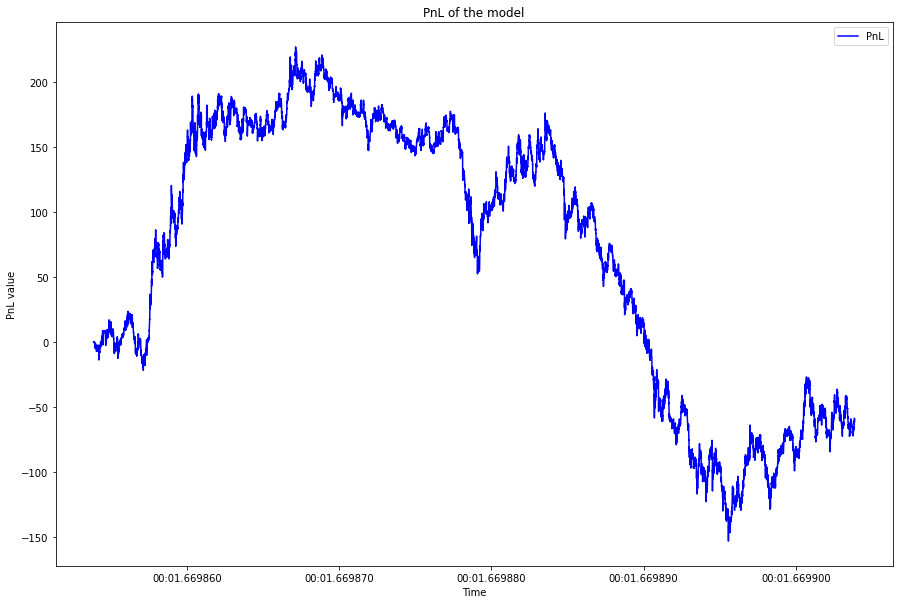

In [25]:
plotter = Graphics(updates_list)

plotter.cum_PnL()